In [ ]:
# 查看当前挂载的数据集目录   ls /home/aistudio/data

In [1]:
import sklearn

# 1 监督学习 supervised learning

## 1.1 回归

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


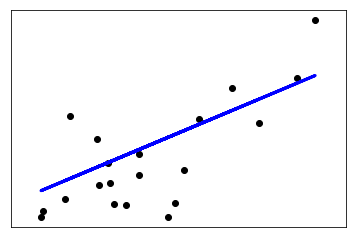

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
diabetes_X = diabetes_X[:, np.newaxis, 2]
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# step 0:Create linear regression object
regr = linear_model.LinearRegression()
# step 1:Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)
# step 2:Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# performance parameters
print('Coefficients: \n', regr.coef_)
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

## 1.4 SVM
- 在高维空间中非常高效.
- 即使在数据维度比样本数量大的情况下仍然有效.
- 在决策函数（称为支持向量）中使用训练集的子集,因此它也是高效利用内存的.
- 通用性: 不同的**核函数**与特定的决策函数一一对应.常见的 kernel 已经提供,也可以指定定制的内核.

## 1.10 决策树

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
0.9111111111111111


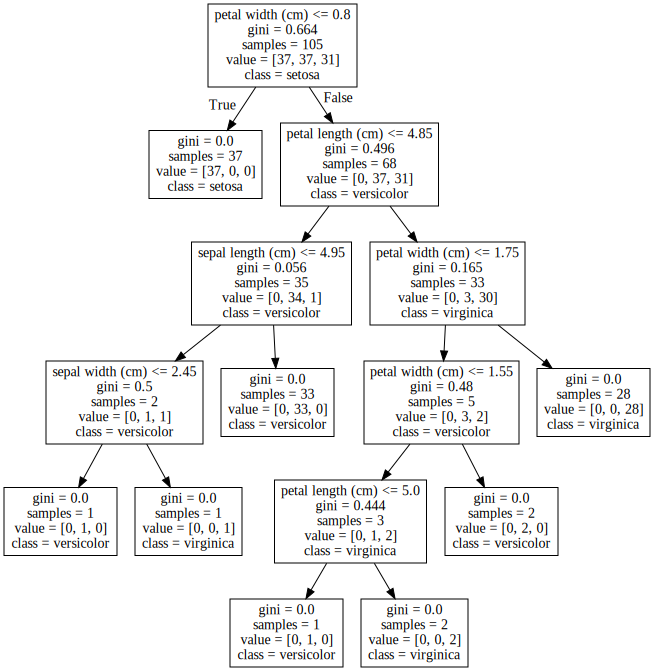

In [27]:
from sklearn.datasets import load_iris
from sklearn import tree

iris = load_iris()
print(iris.target_names)
print(iris.feature_names)

xTrain, xTest, yTrain, yTest = train_test_split(iris.data,iris.target,
                                                    test_size=0.3)       # 划分训练集与测试集
clf = tree.DecisionTreeClassifier()
clf=clf.fit(xTrain,yTrain)

score=clf.score(xTest,yTest)    # 拟合评分
print(score)

import graphviz      # 可视化工具
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=iris.feature_names,  
                                class_names=iris.target_names,  
                                filled=False, rounded=False,  
                                special_characters=False)  
graph = graphviz.Source(dot_data)  
graph